# **Library**

In [ ]:
import cftime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import scipy.integrate as inte
from scipy.stats import shapiro
import xarray as xr
import warnings
import cartopy.crs as ccrs
import cartopy.feature as cfeature
warnings.filterwarnings('ignore')

# **Rainfall DataSet**

In [ ]:
import cftime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import scipy.integrate as inte
from scipy.stats import shapiro
import xarray as xr
import warnings
import cartopy.crs as ccrs
import cartopy.feature as cfeature
warnings.filterwarnings('ignore')
path_CanESM_HP= '../Data/pr_day_CanESM5_historical_r8i1p2f1_gn_18500101-20141231.nc'

fx1 =xr.open_dataset(path_CanESM_HP, engine="netcdf4").sel(time=slice('1951','2014'))

print(fx1)

**Reading Only the data from 1951 to 2015**

In [ ]:
fx1 =xr.open_dataset(path_CanESM_HP, engine="netcdf4").sel(time=slice('1951','2014'))

In [ ]:
print(fx1)

<xarray.Dataset> Size: 766MB
Dimensions:    (time: 23360, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 187kB 1951-01-01 12:00:00 ... 2014-12-31 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 374kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    pr         (time, lat, lon) float32 765MB ...
Attributes: (12/53)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          p2-pictrl
    CCCma_pycmor_hash:           7c87dd3a822d55650b3c17cd65db0ca251282530
    CCCma_runid:                 p2-his08
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/b9fb6cf3-56be-4bc8-8be3-68c9e45...
  

In [ ]:
fx = fx1

In [ ]:
fx1_1951_1 = fx.groupby('time.year')[1951].groupby('time.month')[1].mean('time')

In [ ]:
print(fx1_1951_1)

<xarray.Dataset> Size: 37kB
Dimensions:   (lat: 64, bnds: 2, lon: 128)
Coordinates:
  * lat       (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon       (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 1kB -90.0 -86.58 -86.58 ... 86.58 86.58 90.0
    lon_bnds  (lon, bnds) float64 2kB -1.406 1.406 1.406 ... 355.8 355.8 358.6
    pr        (lat, lon) float32 33kB 3.281e-06 3.459e-06 ... 1.052e-05


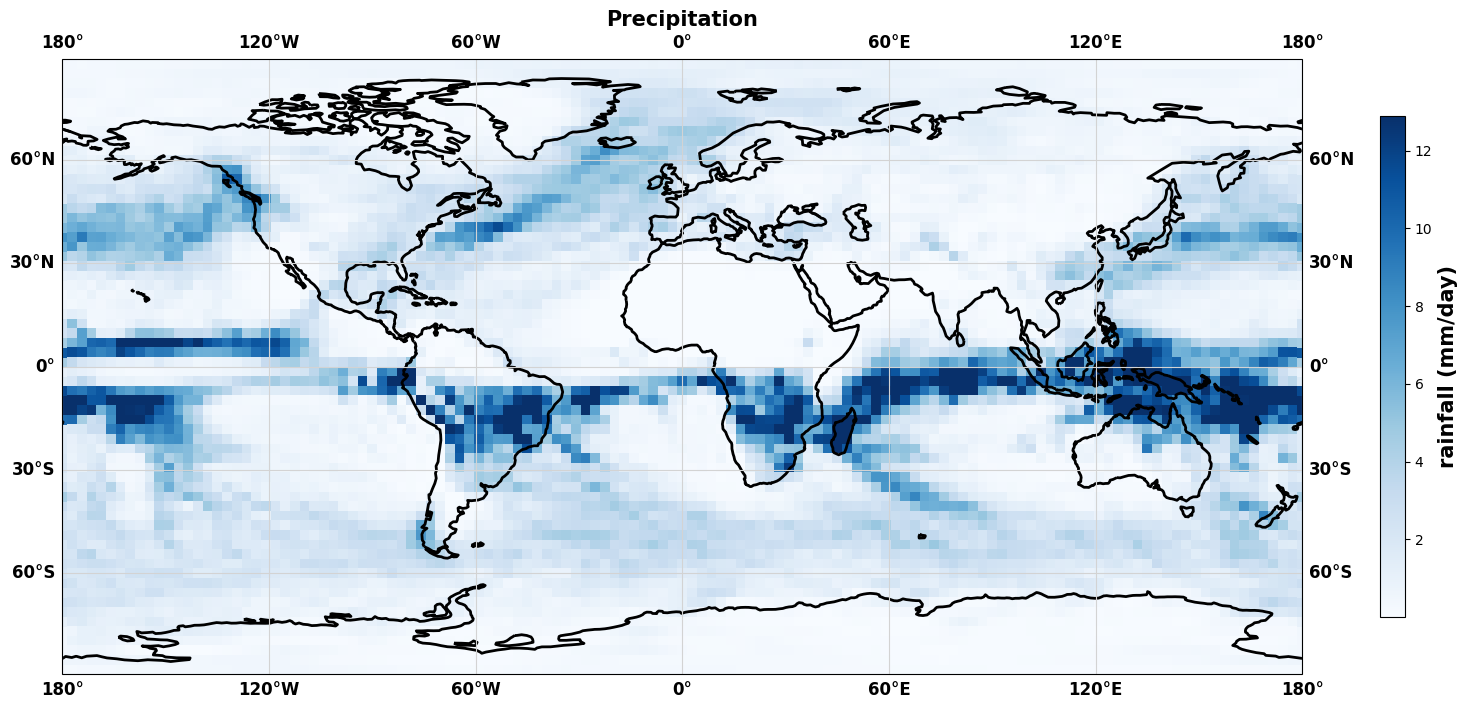

In [ ]:
fig = plt.figure(1, figsize=[20,13])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(linewidth=2, edgecolor='black')  # Add land feature with a black edge)  # Increase the linewidth as desired

#S=fx['pr'].mean(dim='time')*86400
S=fx1_1951_1['pr']*86400

mappable = S.plot.pcolormesh(add_colorbar=False, ax=ax, cmap='Blues', robust=True)
gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

# Customize the color bar label fontsize using Matplotlib
cbar = plt.colorbar(mappable, ax=ax,shrink=0.5,pad=0.05)
label='rainfall (mm/day)'
cbar.set_label(label, fontsize=15, weight='bold')
plt.title('Precipitation', fontsize=15, weight='bold')
#plt.title('', fontsize=15, weight='bold')
plt.xlabel('Longitude', fontsize=15, weight='bold')
plt.ylabel('Latitude', fontsize=15, weight='bold')
plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

plt.show()

In [ ]:
S=fx1['pr'].isel(time=0)*86400

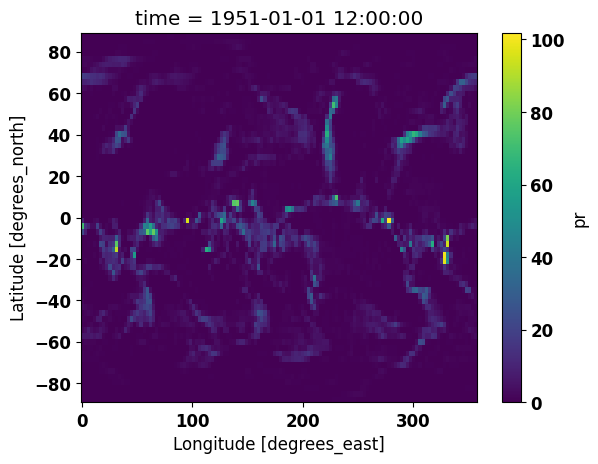

In [ ]:
S.plot()

## **Event Series**

In [ ]:
fx.time.data


array([cftime.DatetimeNoLeap(1951, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 1, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 1, 3, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 12, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 31, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [ ]:
precip=fx.sel(time=fx.time.dt.month.isin([6,7,8,9]))
precip

<xarray.Dataset> Size: 256MB
Dimensions:    (time: 7808, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 62kB 1951-06-01 12:00:00 ... 2014-09-30 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 125kB ...
    lat_bnds   (lat, bnds) float64 1kB -90.0 -86.58 -86.58 ... 86.58 86.58 90.0
    lon_bnds   (lon, bnds) float64 2kB -1.406 1.406 1.406 ... 355.8 355.8 358.6
    pr         (time, lat, lon) float32 256MB ...
Attributes: (12/53)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          p2-pictrl
    CCCma_pycmor_hash:           7c87dd3a822d55650b3c17cd65db0ca251282530
    CCCma_runid:                 p2-his08
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/b9fb6cf3-56be-4bc8-8be3-68c9e45...
    variable_id:                 pr
    variant_label:               r8i1p2f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

In [ ]:
def my_key_values(data):
#------------------to add key values across each day-------------------------------------
    #print(data)
    y=np.arange(1,len(data.pr.data)+1,1)
    yy=lambda data:data.pr*0 + y
    dataX=data.assign(Key_Value=yy)

#-------drop the dry days as days with rainfall less than 1 mm/day-----------
    dataY= dataX.where(dataX.pr>=(1/86400)).dropna('time')

#-------------------------- to define 90th percentile thrushold of a decade-----------------
    sx = dataY.reduce(np.percentile,q=90,interpolation= 'midpoint',dim='time').pr.values
    x5=int(dataY.pr[(dataY.pr)>=sx].count().data)

#-----------------------------Sort in ascending order-------------------------------
    dff=dataY.sortby('pr',ascending=True)
    dff_last_a_percentile = dff.tail(x5)
    dfx =dff_last_a_percentile.sortby('time',ascending=True)

#--------------------key values across extreme events---------------------------------
    key=list(dfx.Key_Value.data)
    return key

In [ ]:
precip.sel(lat=precip.lat.values[0],lon=precip.lon.values[0])

NameError: name 'precip' is not defined

In [ ]:
S = my_key_values(precip.sel(lat=precip.lat.values[0],lon=precip.lon.values[0]))

In [ ]:
# total_days=64*122
# D90=total_days*0.1
# D90
S

[918.0,
 2204.0,
 2205.0,
 2336.0,
 2975.0,
 3299.0,
 3333.0,
 3980.0,
 3994.0,
 4024.0,
 4025.0,
 4344.0,
 4345.0,
 4526.0,
 4529.0,
 6250.0,
 6953.0,
 8065.0,
 8156.0,
 9247.0,
 9325.0,
 9341.0,
 9788.0,
 9859.0,
 11595.0,
 12115.0,
 12540.0,
 12756.0,
 12862.0,
 12863.0,
 13202.0,
 13471.0,
 13617.0,
 13708.0,
 15332.0,
 15385.0,
 15632.0,
 15669.0,
 16042.0,
 16449.0,
 16613.0,
 16823.0,
 16908.0,
 17151.0,
 17528.0,
 18252.0,
 18975.0,
 18989.0,
 19198.0,
 20257.0,
 20258.0,
 20373.0,
 20529.0,
 20768.0,
 20769.0,
 20817.0,
 21512.0,
 21978.0,
 21979.0,
 22681.0,
 23030.0]

In [ ]:
lat=precip['lat'].values.tolist()
lon=precip['lon'].values.tolist()
data=[]
zipped=zip(lat,lon)                        # to make lat/lon pair or just a node address
for i in lat:
    for j in lon:
        dfxz=precip.sel(lon=j,lat=i)
        data.append(dfxz)

In [ ]:
len(data)

8192

In [ ]:
data[3]
my_key_values(data[3])

[393.0,
 1845.0,
 2205.0,
 2975.0,
 3299.0,
 3333.0,
 3668.0,
 3980.0,
 3994.0,
 4024.0,
 4025.0,
 4165.0,
 4344.0,
 4345.0,
 4526.0,
 4529.0,
 6250.0,
 6826.0,
 6953.0,
 8065.0,
 9247.0,
 9325.0,
 9494.0,
 9788.0,
 11595.0,
 12012.0,
 12115.0,
 12862.0,
 12863.0,
 13202.0,
 13471.0,
 13617.0,
 13708.0,
 15332.0,
 15385.0,
 15632.0,
 15669.0,
 16449.0,
 16613.0,
 16823.0,
 16908.0,
 17152.0,
 17528.0,
 18311.0,
 18989.0,
 19198.0,
 20197.0,
 20257.0,
 20373.0,
 20529.0,
 20768.0,
 20769.0,
 20770.0,
 20817.0,
 21512.0,
 21978.0,
 21979.0,
 22681.0]

In [ ]:


'''Example array
arr = np.array([0.1, 0.5, 0.3, 0.15, 0.8, 0.05])

# Replace values less than 0.2 with 0
arr[arr < 0.2] = 0

print(arr)'''


[0.  0.5 0.3 0.  0.8 0. ]


In [ ]:
data

4884

In [ ]:
nodes=len(data)   #len(dfx)
X = []
for i in range(nodes):
    arr = np.array(my_key_values(data[i]))
    arr[arr < 0.2] = 0
    X.append(arr)
print(X)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
for i in range(51,100):
    X.append(my_key_values(data[i]))
print(X)

[[23.0, 24.0, 26.0, 27.0, 50.0, 54.0, 56.0, 57.0, 58.0, 59.0, 60.0, 80.0, 81.0, 86.0, 87.0, 152.0, 153.0, 154.0, 156.0, 157.0, 162.0, 186.0, 187.0, 188.0, 189.0, 191.0, 192.0, 193.0, 196.0, 220.0, 273.0, 274.0, 275.0, 281.0, 282.0, 290.0, 391.0, 392.0, 393.0, 394.0, 395.0, 513.0, 516.0, 517.0, 518.0, 519.0, 526.0, 527.0, 532.0, 533.0, 583.0, 584.0, 636.0, 653.0, 655.0, 657.0, 658.0, 668.0, 669.0, 670.0, 671.0, 675.0, 677.0, 678.0, 718.0, 761.0, 822.0, 877.0, 881.0, 882.0, 921.0, 1014.0, 1021.0, 1022.0, 1023.0, 1026.0, 1027.0, 1028.0, 1029.0, 1032.0, 1033.0, 1034.0, 1075.0, 1080.0, 1081.0, 1082.0, 1126.0, 1154.0, 1190.0, 1245.0, 1246.0, 1247.0, 1250.0, 1252.0, 1274.0, 1275.0, 1280.0, 1281.0, 1315.0, 1321.0, 1322.0, 1358.0, 1359.0, 1360.0, 1361.0, 1362.0, 1364.0, 1365.0, 1373.0, 1400.0, 1401.0, 1414.0, 1423.0, 1424.0, 1425.0, 1426.0, 1427.0, 1488.0, 1557.0, 1558.0, 1559.0, 1636.0, 1734.0, 1746.0, 1747.0, 1749.0, 1750.0, 1751.0, 1752.0, 1788.0, 1870.0, 1872.0, 1901.0, 1902.0, 1978.0, 1982

In [ ]:
for i in range(101,154):
    X.append(my_key_values(data[i]))
print(X)

[[23.0, 24.0, 26.0, 27.0, 50.0, 54.0, 56.0, 57.0, 58.0, 59.0, 60.0, 80.0, 81.0, 86.0, 87.0, 152.0, 153.0, 154.0, 156.0, 157.0, 162.0, 186.0, 187.0, 188.0, 189.0, 191.0, 192.0, 193.0, 196.0, 220.0, 273.0, 274.0, 275.0, 281.0, 282.0, 290.0, 391.0, 392.0, 393.0, 394.0, 395.0, 513.0, 516.0, 517.0, 518.0, 519.0, 526.0, 527.0, 532.0, 533.0, 583.0, 584.0, 636.0, 653.0, 655.0, 657.0, 658.0, 668.0, 669.0, 670.0, 671.0, 675.0, 677.0, 678.0, 718.0, 761.0, 822.0, 877.0, 881.0, 882.0, 921.0, 1014.0, 1021.0, 1022.0, 1023.0, 1026.0, 1027.0, 1028.0, 1029.0, 1032.0, 1033.0, 1034.0, 1075.0, 1080.0, 1081.0, 1082.0, 1126.0, 1154.0, 1190.0, 1245.0, 1246.0, 1247.0, 1250.0, 1252.0, 1274.0, 1275.0, 1280.0, 1281.0, 1315.0, 1321.0, 1322.0, 1358.0, 1359.0, 1360.0, 1361.0, 1362.0, 1364.0, 1365.0, 1373.0, 1400.0, 1401.0, 1414.0, 1423.0, 1424.0, 1425.0, 1426.0, 1427.0, 1488.0, 1557.0, 1558.0, 1559.0, 1636.0, 1734.0, 1746.0, 1747.0, 1749.0, 1750.0, 1751.0, 1752.0, 1788.0, 1870.0, 1872.0, 1901.0, 1902.0, 1978.0, 1982

In [ ]:
for i in range(len(X)):
  print(len(X[i]))

542
608
512
406
92
249
316
500
651
766
768
379
407
295
261
162
217
329
497
664
757
762
148
209
120
188
256
215
274
405
617
734
731
83
43
45
112
245
386
323
390
607
741
704
80
17
47
110
195
315
547
671
685
633
23
27
44
59
53
100
217
443
639
618
569
28
53
111
70
40
83
155
277
569
692
682
23
28
37
40
41
43
28
18
118
324
480
48
13
19
121
136
96
205
109
65
114
300
25
90
22
10
25
172
226
118
199
453
56
180
238
106
19
7
12
29
29
34
102
110
106
178
445
471
306
108
56
48
33
90
22
10
25
172
226
118
199
453
56
180
238
106
19
7
12
29
29
34
102
110
106
178
445
471
306
108
56
48
33
52
137
127
96
98
81
62
62
86
120
253
414
233
262
317
321
255
322
556
583
358
302
498
90
22
10
25
172
226
118
199
453
56
180
238
106
19
7
12
29
29
34
102
110
106
178
445
471
306
108
56
48
33
52
137
127
96
98
81
62
62
86
120
253
414
233
262
317
321
255
322
556
583
358
302
498


## **Strength of Synchronization**

In [ ]:
def c(X,Y):
    A = [X[ind+1] - X[ind] if ind < len(X)-1 else 0 for ind in range(len(X))]
    B = [X[ind] - X[ind-1] if ind > 0 else 0 for ind in range(len(X))]
    C = [Y[ind+1] - Y[ind] if ind < len(Y)-1 else 0 for ind in range(len(Y))]
    D = [Y[ind] - Y[ind-1] if ind > 0 else 0 for ind in range(len(Y))]
    ones = 0

    halves = 0
    def get_J(i,j):
        nonlocal halves
        nonlocal ones
        if X[i] == Y[j]:
            halves +=1
            return 0.5
        elif (X[i]-Y[j] > 0) and (X[i]-Y[j] < abs(min(A[i], B[i], C[j], D[j]) / 2.0)):
            ones += 1
            return 1
        else:
            return 0


    J_dict = {(i,j):get_J(i,j) for i in range(len(X)) for j in range(len(Y)) }

    return sum(list(J_dict.values()))

In [ ]:
import math
def syn_strength(Xi,Xj):
    xx=math.sqrt((len(Xi)*len(Xj)))
    Qi_j=(c(Xi,Xj)+c(Xj,Xi))/xx
    Qi_j=round(Qi_j,3)
    return Qi_j

In [ ]:
len(X)

235

In [ ]:
SYN=[]
for i in range(len(X)):
    temp=[]
    for j in range(len(X)):
        temp.append(syn_strength(X[i],X[j]))
    SYN.append(np.array(temp))
SYN

KeyboardInterrupt: 

Below matrix is called strength of synchronization: It values ranges from 0 ( no synchronization) to 1 ( complete synchronization).
1. Dialgonal elements are 1 ( as it makes sense).
2. Matrix is symmetric, for the further process we will take only upper triangular matrix) to develop an adjaceny matrix.
3. We will define a threshold and if the strength of synrhronization is above the sthreshold, the we will convert that value to 1 ( i.e a link) and if bekow the threshold, we will assign a value as 0, no link.
4.         

In [ ]:
print(SYN)

[]


In [ ]:
len(SYN)

10

## **Adjacency Matrix**

In [ ]:
data = np.array(SYN)

# Set diagonal elements to zero
np.fill_diagonal(data, 0)

# Create an upper triangular matrix without the diagonal
upper_triangular = np.triu(data, k=1)

# Extract the upper triangular part (excluding diagonal)
upper_triangular = upper_triangular [np.triu_indices(upper_triangular.shape[0], k=1)]
th95=np.round(np.percentile(upper_triangular, 95),3)
th95

0.203

In [ ]:
# Convert to adjacency matrix (where values >= threshold are set to 1, else 0)
adjacency_matrix = (data >= th95).astype(int)
adjacency_matrix

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

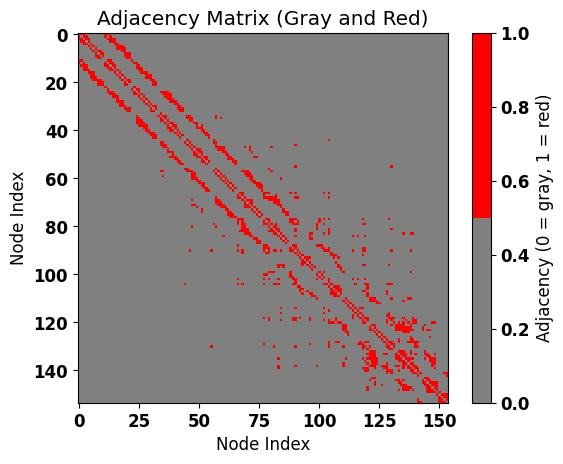

In [ ]:
from matplotlib.colors import ListedColormap
# Create a custom colormap: gray for 0, red for 1
cmap = ListedColormap(['gray', 'red'])

# Plot the matrix
plt.imshow(adjacency_matrix, cmap=cmap, interpolation='nearest')
plt.colorbar(label='Adjacency (0 = gray, 1 = red)')
plt.title('Adjacency Matrix (Gray and Red)')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.show()

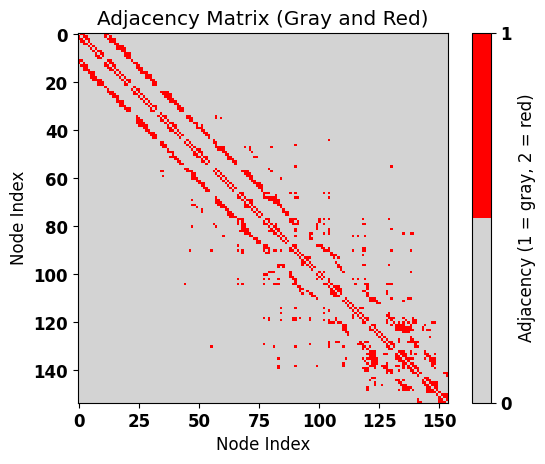

In [ ]:


# Create a custom colormap: gray for 0, red for 1
cmap = ListedColormap(['lightgrey', 'red'])

# Plot the matrix
plt.imshow(adjacency_matrix, cmap=cmap, interpolation='nearest')

# Customize the colorbar
cbar = plt.colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])  # Setting 1 for gray, 2 for red
cbar.set_label('Adjacency (1 = gray, 2 = red)')

# Add labels and title
plt.title('Adjacency Matrix (Gray and Red)')
plt.xlabel('Node Index')
plt.ylabel('Node Index')

# Show the plot
plt.show()


In [ ]:
dec=np.sum(adjacency_matrix,axis=1)
dec

array([ 4,  5,  8,  6,  5,  5,  6,  5,  6,  6,  4,  5,  7,  9,  8,  8,  8,
        7,  8,  9,  7,  7,  2,  4,  9, 10,  8,  6,  8,  6,  8,  8,  6,  1,
        7,  9,  8,  9,  9,  8,  7,  7,  7,  4,  3,  6,  7, 11,  8,  9,  6,
       11,  7,  7,  4,  2,  4, 11,  7,  8,  8,  6,  8,  7,  6,  4,  9,  4,
       13, 12,  9, 10,  9,  6,  8,  7,  4, 13,  8, 15,  8, 10, 10, 13, 10,
        6,  4,  3,  8, 10, 20,  6,  6,  6,  2,  4, 10,  6,  2,  8,  5,  4,
       12,  2, 18,  7,  7,  9,  9,  6,  8,  7,  4,  2,  7,  3,  5,  5, 16,
       15, 16, 11, 12, 16,  7,  3,  4,  5, 15, 10, 13,  4,  8, 15,  9, 19,
       11, 12, 17, 13,  9,  7,  2,  4,  7,  9, 10,  9, 10,  5,  4,  3,  4,
        5])

In [ ]:
def temporal_DC(G):
    output=G
    a=0.98
    b=0.02
    output[output > np.quantile(output,a)] =np.quantile(output,a)
    output[output < np.quantile(output,b)] =np.quantile(output,b)
    return output

In [ ]:
D90=temporal_DC(dec)
D90.shape

(154,)

In [ ]:
#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
def plot_map(lon,lat,data,file_name):
        #     m = Basemap(projection='cyl', resolution='l',
        #             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
        #             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

        m = Basemap(projection='cyl', resolution='l',
        llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
        llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )
        #m.drawcoastlines()
        #plt.show()
        lons,lats= np.meshgrid(lon,lat)
        x,y = m(lons,lats)

        #m.drawcoastlines()
        levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
        #levels = np.linspace(0.0,1.0,21)
        #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
        temp = m.contourf(x,y,data,levels=levels,cmap='Blues')
        cb = m.colorbar(temp,shrink=0.5,pad=0.05)
        cb.set_label(label, fontsize=15, weight='bold')
        m.drawcoastlines()
        m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
        #plt.title('sst')
        #cb.set_label('sst')
        cbar.set_label(label, fontsize=15, weight='bold')
        plt.title('Precipitation', fontsize=15, weight='bold')
        #plt.title('', fontsize=15, weight='bold')
        plt.xlabel('Longitude', fontsize=15, weight='bold')
        plt.ylabel('Latitude', fontsize=15, weight='bold')
        plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

        plt.savefig(file_name)



        plt.show()
        plt.clf()



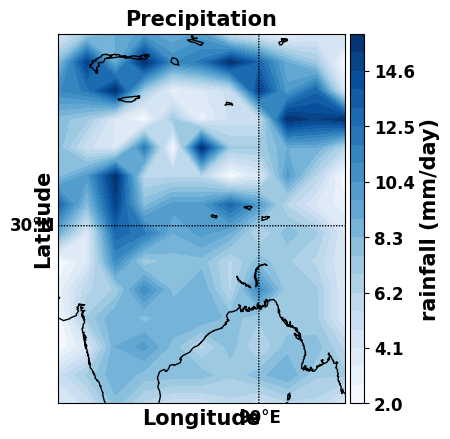

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_map(precip.lon.values,precip.lat.values,D90.reshape(14,11),'file.png')